<IPython.core.display.Javascript object>


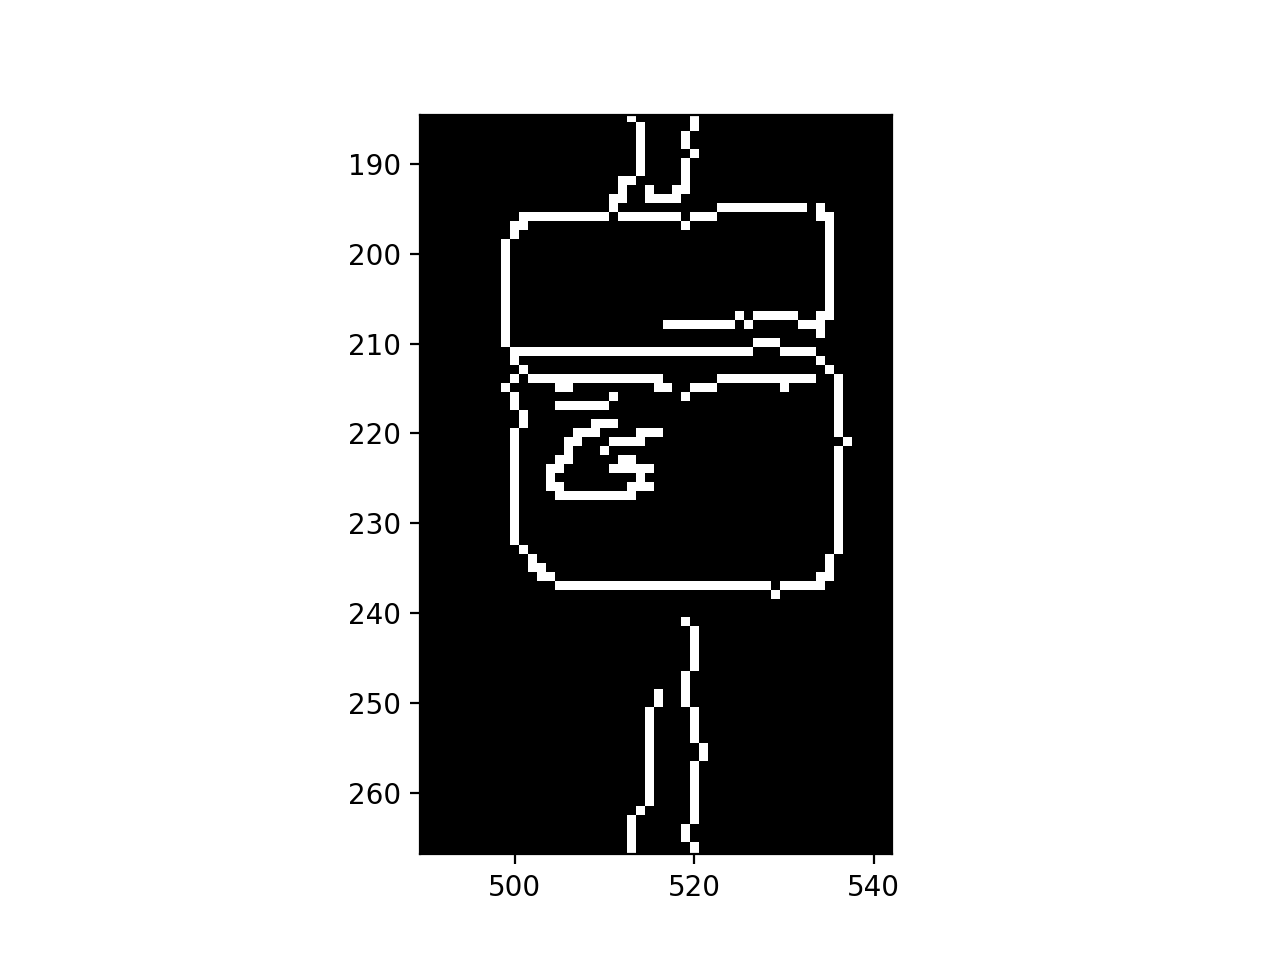

In [137]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

img = cv2.imread('ex.png',0)
img = cv2.GaussianBlur(np.uint8(img), (3,3), 0)
sigma = 0.33
v = np.median(img)
# apply automatic Canny edge detection using the computed median
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
edges = cv2.Canny(img,lower,upper)

plt.imshow(edges,cmap = 'gray')

In [138]:
im2, contours, hierarchy = cv2.findContours(np.uint8(edges),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
len(contours)

315

In [126]:
img.shape

(300, 400)

In [139]:
ar = []

In [140]:
conts = []
for i in range(len(contours)):
    x,y,w,h = cv2.boundingRect(contours[i])
    cA = w*h
    
#     if(cA>500):
#     conts.append([x,y,w,h,cA,i])
    
    if(h!=0 and w/h>=0.5 and w/h<=2):
        ar.append(cA)
    
len(ar)

205

In [141]:
mx = max(ar) 
perLen = 0.07

for i in range(len(contours)):
    
    x,y,w,h = cv2.boundingRect(contours[i])
    cA = w*h
    if(w>=img.shape[0]*perLen and h>=img.shape[1]*perLen and h!=0 and w/h>=0.5 and w/h<=2):
        conts.append([x,y,w,h,cA,i])
    
    
conts = sorted(conts, reverse = True, key = lambda value : (value[4]))
# conts[:10]
    
conts = np.array(conts)

In [120]:
mx*0.2

4082.6000000000004

In [143]:
shape = "unidentified"

for i in range(len(conts)):
    peri = cv2.arcLength(contours[conts[i,5]], True)
    approx = cv2.approxPolyDP(contours[conts[i,5]], 0.04 * peri, True)
    print(len(approx))

2
2
2
2
2
2
2
2
8


In [142]:
len(conts)

9

<IPython.core.display.Javascript object>


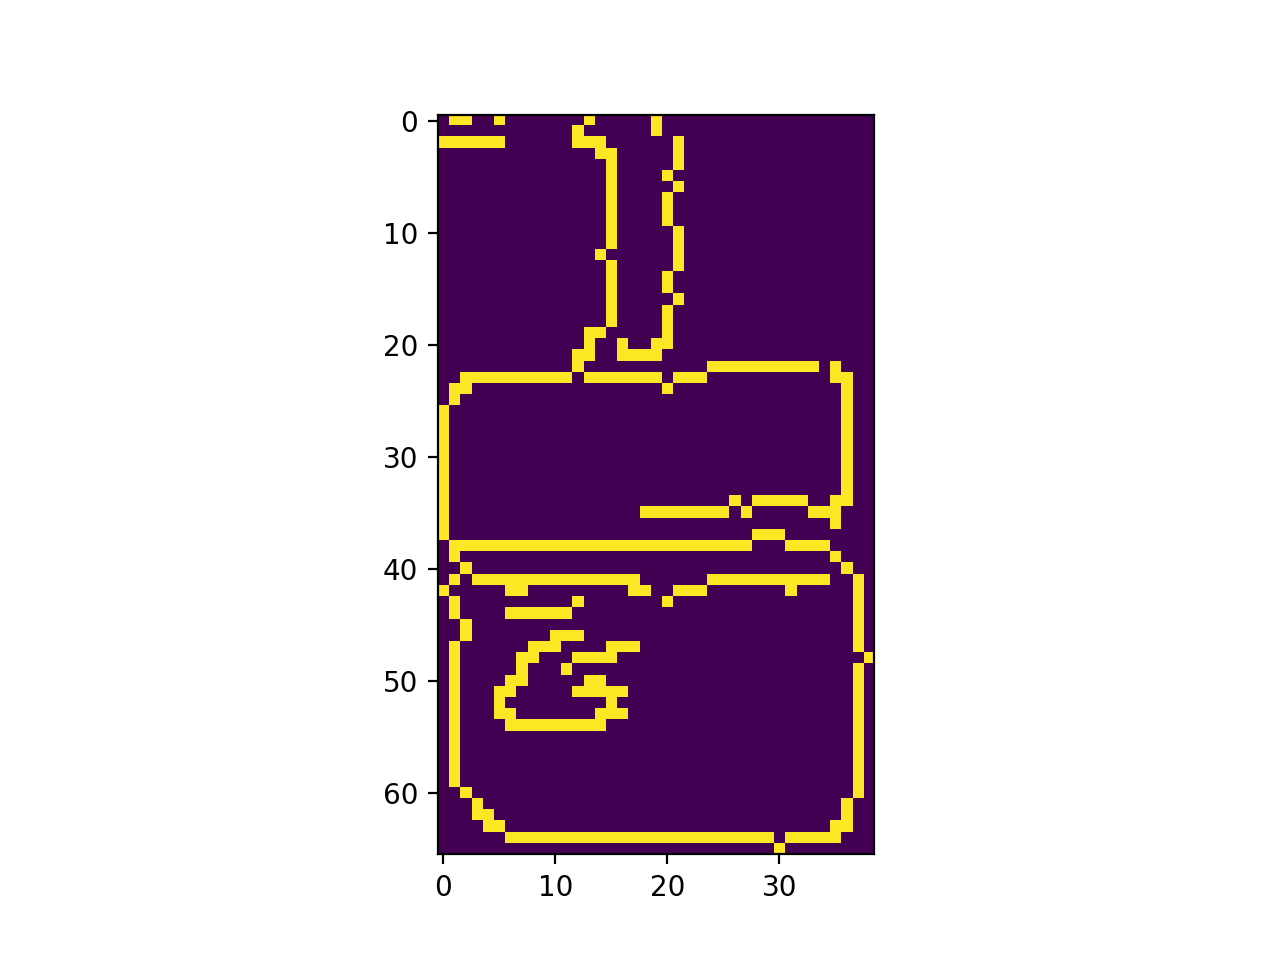

In [145]:
ind = 8
plt.imshow(edges[  conts[ind,1] : conts[ind,1] + conts[ind,3] , conts[ind,0] : conts[ind,0] + conts[ind,2]  ])

<IPython.core.display.Javascript object>


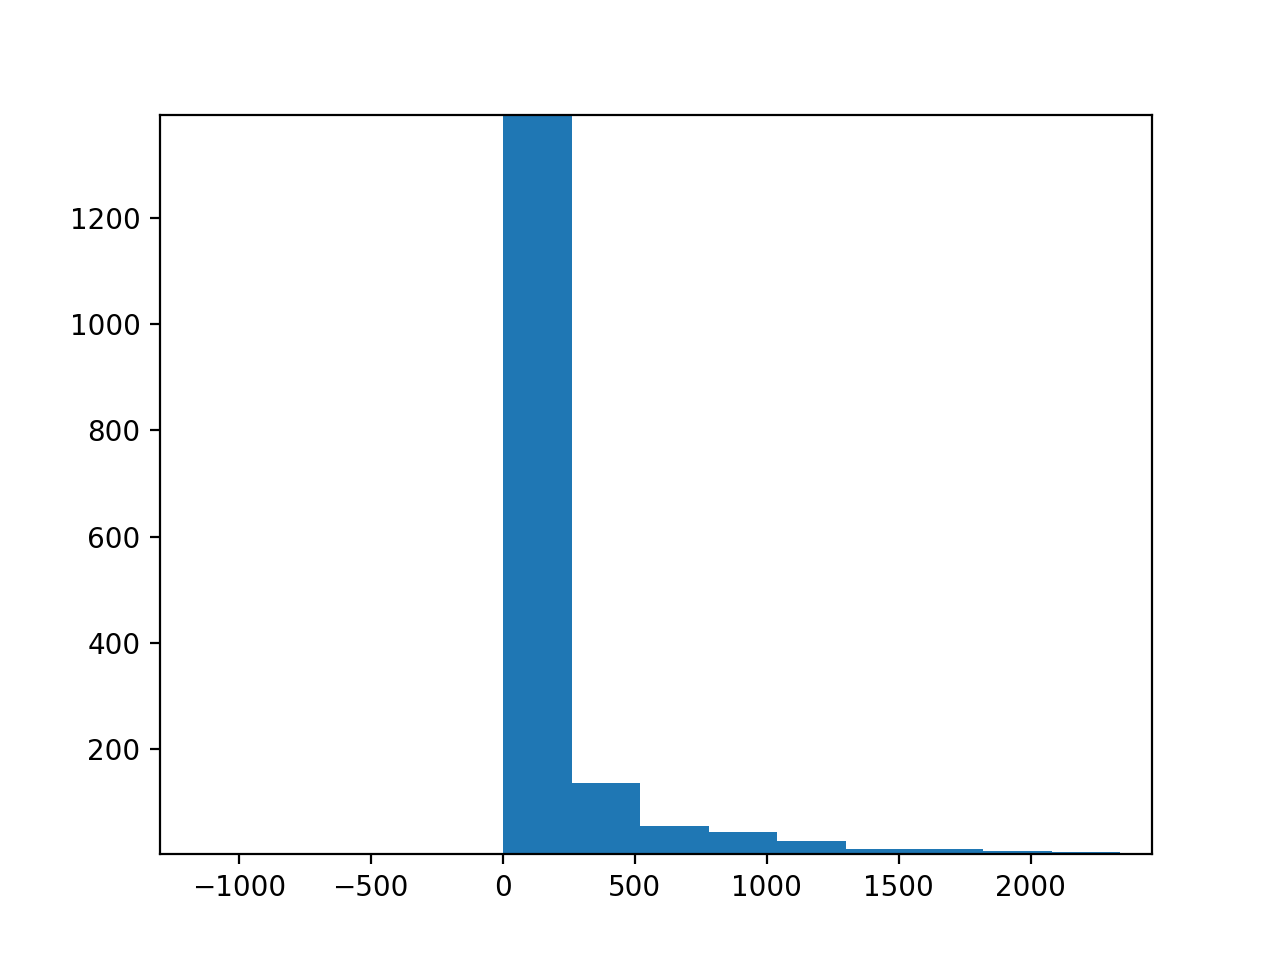

(array([2.50e+03, 1.36e+02, 5.40e+01, 4.40e+01, 2.60e+01, 1.20e+01,
        1.20e+01, 8.00e+00, 6.00e+00, 0.00e+00, 4.00e+00, 8.00e+00,
        2.00e+00, 2.00e+00, 2.00e+00, 2.00e+00, 0.00e+00, 2.00e+00,
        6.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 4.00e+00, 2.00e+00, 0.00e+00, 2.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 2.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        2.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        2.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 2.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 

In [26]:
plt.hist(ar, bins = 100)

In [73]:
approx = []
for i in range(len(conts)):
    peri = cv2.arcLength(contours[conts[i,5]], True)
    approx.append(len(cv2.approxPolyDP(contours[conts[i,5]], 0.04 * peri, True)))

In [76]:
sum(np.array(approx) == 8)

7

In [84]:
import Augmentor
p = Augmentor.Pipeline('./')
# Point to a directory containing ground truth data.
# Images with the same file names will be added as ground truth data
# and augmented in parallel to the original data.
p.ground_truth("/output")
# Add operations to the pipeline as normal:
p.rotate(probability=0.5, max_left_rotation=5, max_right_rotation=5)
p.flip_left_right(probability=0.5)
p.zoom_random(probability=0.5, percentage_area=0.99)
p.flip_top_bottom(probability=0.5)
p.sample(50)

Processing <PIL.Image.Image image mode=RGB size=360x240 at 0x11C7FA908>:   2%|▏         | 1/50 [00:00<00:07,  6.78 Samples/s]

Initialised with 27 image(s) found.
Output directory set to ./output.0 ground truth image(s) found.


Processing <PIL.Image.Image image mode=RGB size=551x371 at 0x11C817C18>: 100%|██████████| 50/50 [00:00<00:00, 101.79 Samples/s]                   
